# Annotators

In [1]:
import os
import sys
import warnings

import pandas as pd

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing

In [2]:
pd.set_option('max_colwidth', 800)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')
dataset_path = os.path.join(base_data_path, 'financial_phrase_bank/annotators')
annotator_path = os.path.join(dataset_path, 'maya_annotations-financial_phrasebank_statements-v2.csv')
print(annotator_path)
df = DataProcessing.load_from_file(annotator_path, 'csv', sep = ",", encoding = 'latin')
df.dropna(inplace=True)
df.head(3)

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/financial_phrase_bank/annotators/maya_annotations-financial_phrasebank_statements-v2.csv


,statement,maya_label
1,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",NON-PREDICTION
3,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",NON-PREDICTION
5,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",NON-PREDICTION


In [4]:
len(df)

997

In [5]:
# Using custom column name
numerical_labels_df = DataProcessing.match_text_label_to_int(
    df, 
    text_label_col_name='maya_label',
    target_label='PREDICTION'  # This is the default
)
numerical_labels_df.head(3)

,statement,maya_label,Binary Label
0,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,PREDICTION,1
1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",PREDICTION,1
2,TeliaSonera TLSN said the offer is in line with its strategy to increase its ownership in core business holdings and would strengthen Eesti Telekom 's offering to its customers .,PREDICTION,1


In [6]:
filt_predictions = (numerical_labels_df['Binary Label'] == 1)
predictions_df = numerical_labels_df[filt_predictions]

non_predictions_df = numerical_labels_df[~filt_predictions]
non_predictions_df.head(3)

,statement,maya_label,Binary Label
77,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",NON-PREDICTION,0
78,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",NON-PREDICTION,0
79,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",NON-PREDICTION,0


In [7]:
predictions_df.head(3)

,statement,maya_label,Binary Label
0,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,PREDICTION,1
1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",PREDICTION,1
2,TeliaSonera TLSN said the offer is in line with its strategy to increase its ownership in core business holdings and would strengthen Eesti Telekom 's offering to its customers .,PREDICTION,1


In [8]:
predictions_ratio = len(predictions_df) / len(numerical_labels_df) * 100
non_predictions_ratio = len(non_predictions_df) / len(numerical_labels_df) * 100
predictions_ratio, non_predictions_ratio

(7.723169508525577, 92.27683049147443)

In [9]:
predictions_ratio + non_predictions_ratio

100.0

In [10]:
stats = {'N_predictions': len(predictions_df),
         'N_non_predictions': len(non_predictions_df),
         }

stats_df = pd.Series(data=stats)
stats_df

N_predictions         77
N_non_predictions    920
dtype: int64

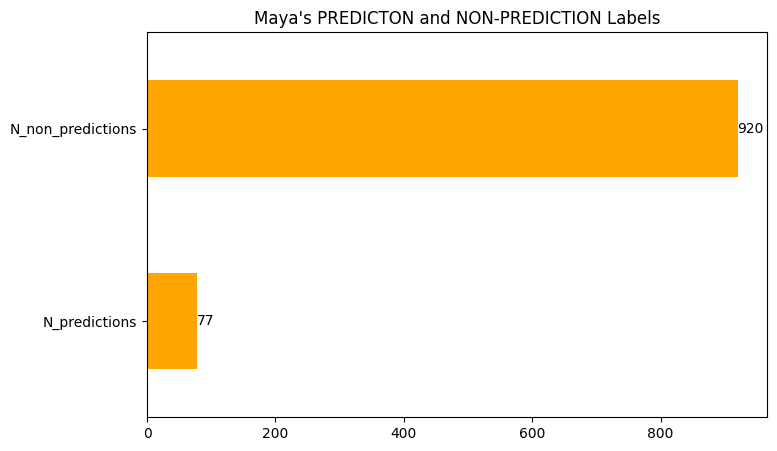

In [11]:
ax = stats_df.plot.barh(color='orange', figsize=(8, 5))
ax.set_title("Maya's PREDICTON and NON-PREDICTION Labels")

for container in ax.containers:
    ax.bar_label(container)
